In [2]:
import awkward as ak
import matplotlib.pyplot as plt
import os, sys
import subprocess
import json
import uproot
from coffea.nanoevents import NanoEventsFactory, ScoutingNanoAODSchema
from coffea.lookup_tools.lookup_base import lookup_base
import numpy as np
from coffea import processor, util
from hist import Hist
import hist
from coffea.analysis_tools import Weights, PackedSelection
from collections import defaultdict
import mplhep
plt.style.use(mplhep.style.CMS)

In [4]:
import pandas as pd

out = util.load("outfiles/Run3Summer22/fulllumi/nminus1_TTtoLNu2Q_isoTrack_jetId_btag0p1.coffea")[0]

lumis = {
    "2022d" : 100
}
xs = {
    "TTtoLNu2Q" : 762.1,
    "QCD" : 222.1,
}
era = "2022d"

scale_lumi = {k: xs[k] * lumis[era] / w for k, w in out['sumw'].items()}

df = pd.DataFrame([])
h = out["cutflow"][{
    "pn_Hbb" : slice(0j, 1j, sum),
    "msoftdrop" : slice(hist.underflow+1, hist.overflow-1, sum),
    "region" : hist.loc("all"),
}]
for i, name in enumerate(h.axes["dataset"]):
    h.view(flow=True)[i] *= scale_lumi[name]

df["Total"] = h[{"dataset" : sum, "cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]}][{"cat" : sum}].values()
#df["Uncertanity"] = np.sqrt(h[{"dataset" : sum, "cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]}][{"cat" : sum}].variances())

df["Non"] = h[{"dataset" : sum, "cat" : hist.loc(3)}].values()
df["W"] = h[{"dataset" : sum, "cat" : hist.loc(2)}].values()
df["Top"] = h[{"dataset" : sum, "cat" : hist.loc(1)}].values()

df.index = ['Nothing','HLT_Mu50','AK8 p$_T$ > 200 GeV','MET $>$ 50 GeV','Good muon','Leptonic W p$_T$ > 150','Same hem. AK4 b-jet','Opp. hem. AK8 jet', 'Muon track dz']

for column in ["Total", "Non", "W", "Top"]:

    percentage = []

    for i in range(len(df[column])):
        percentage.append(df[column][i] / df[column][0] * 100)
        
    df[f"{column} %"] = percentage
    
for column in ["Total", "Non", "W", "Top"]:

    rel_percentage = []

    for i in range(len(df[column])):
        rel_percentage.append(df[column][i] / df[column][i-1 if i > 1 else 0] * 100)
        
    df[f"{column} (rel %)"] = rel_percentage

df.style.format("{:,.1f}")

/opt/conda/lib/python3.8/site-packages/hist/basehist.py:325: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


,Total,Non,W,Top,Total %,Non %,W %,Top %,Total (rel %),Non (rel %),W (rel %),Top (rel %)
Nothing,94.0,63.5,24.8,5.8,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
HLT_Mu50,88.9,59.7,23.6,5.6,94.6,94.1,95.3,96.9,94.6,94.1,95.3,96.9
AK8 p$_T$ > 200 GeV,69.7,44.4,19.8,5.5,74.2,69.9,80.1,95.9,78.4,74.3,84.1,99.0
MET $>$ 50 GeV,47.7,29.8,13.5,4.4,50.7,47.0,54.4,75.5,68.3,67.2,67.9,78.7
Good muon,47.7,29.8,13.5,4.4,50.7,47.0,54.4,75.5,100.0,100.0,100.0,100.0
Leptonic W p$_T$ > 150,33.1,19.8,9.7,3.5,35.2,31.2,39.3,61.1,69.4,66.4,72.2,81.0
Same hem. AK4 b-jet,0.4,0.3,0.1,0.1,0.5,0.4,0.5,0.9,1.3,1.4,1.2,1.5
Opp. hem. AK8 jet,0.4,0.3,0.1,0.1,0.5,0.4,0.5,0.9,100.0,100.0,100.0,100.0
Muon track dz,0.4,0.3,0.1,0.1,0.5,0.4,0.5,0.9,100.0,100.0,100.0,100.0


## Data

In [4]:
import pandas as pd

out = util.load("outfiles/Run3Summer22/lumi25000hltmu50/cutflow_Run2022D_HLT_Mu50_noCHS.coffea")

df = pd.DataFrame([])
h = out["cutflow"][{
    "pn_Hbb" : slice(0j, 1j, sum),
    "cat" : sum,
    "dataset" : sum,
    "msoftdrop" : slice(hist.underflow+1, hist.overflow-1, sum)
}]

df["Total"] = h.values()
#df["Uncertanity"] = np.sqrt(h[{"dataset" : sum, "cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]}][{"cat" : sum}].variances())

df.index = ['Nothing','HLT_Mu50','AK8 p$_T$ > 200 GeV','MET $>$ 50 GeV','Good muon','Leptonic W p$_T$ > 150','Same hem. AK4 b-jet','Opp. hem. AK8 jet', 'Muon trk dz']

percentage = []
rel_percentage = []

for i in range(len(df["Total"])):
    percentage.append(df["Total"][i] / df["Total"][0] * 100)
    rel_percentage.append(df["Total"][i] / df["Total"][i-1 if i > 1 else 0] * 100)

df[f"Total %"] = percentage
df[f"Total (rel %)"] = rel_percentage

df.style.format("{:,.1f}")

,Total,Total %,Total (rel %)
Nothing,"1,391.0",100.0,100.0
HLT_Mu50,"1,351.0",97.1,97.1
AK8 p$_T$ > 200 GeV,"1,083.0",77.9,80.2
MET $>$ 50 GeV,626.0,45.0,57.8
Good muon,626.0,45.0,100.0
Leptonic W p$_T$ > 150,373.0,26.8,59.6
Same hem. AK4 b-jet,3.0,0.2,0.8
Opp. hem. AK8 jet,3.0,0.2,100.0
Muon trk dz,3.0,0.2,100.0


In [43]:
import pandas as pd

out = util.load("outfiles/Run3Summer22/lumi25000hltmu50/btag_Run2022D_HLT_Mu50_noCHS.coffea")

df = pd.DataFrame([])
h = out["cutflow"][{
    "pn_Hbb" : slice(0j, 1j, sum),
    "cat" : sum,
    "msoftdrop" : slice(hist.underflow+1, hist.overflow-1, sum)
}]

df["Total"] = h.values()
#df["Uncertanity"] = np.sqrt(h[{"dataset" : sum, "cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]}][{"cat" : sum}].variances())

df.index = ['Nothing','HLT_Mu50','AK8 p$_T$ > 200 GeV','MET $>$ 50 GeV','Good muon','Leptonic W p$_T$ > 150','Same hem. AK4 b-jet','Opp. hem. AK8 jet', 'Muon trk dz', 'Muon trackIso']

percentage = []
rel_percentage = []

for i in range(len(df["Total"])):
    percentage.append(df["Total"][i] / df["Total"][0] * 100)
    rel_percentage.append(df["Total"][i] / df["Total"][i-1 if i > 1 else 0] * 100)

df[f"Total %"] = percentage
df[f"Total (rel %)"] = rel_percentage

df.style.format("{:,.1f}")

,Total,Total %,Total (rel %)
Nothing,"82,650.0",100.0,100.0
HLT_Mu50,"80,940.0",97.9,97.9
AK8 p$_T$ > 200 GeV,"69,708.0",84.3,86.1
MET $>$ 50 GeV,"30,344.0",36.7,43.5
Good muon,"30,344.0",36.7,100.0
Leptonic W p$_T$ > 150,"12,076.0",14.6,39.8
Same hem. AK4 b-jet,"3,513.0",4.3,29.1
Opp. hem. AK8 jet,"1,780.0",2.2,50.7
Muon trk dz,37.0,0.0,2.1
Muon trackIso,26.0,0.0,70.3


In [5]:
out = util.load("outfiles/Run3Summer22/lumi25000hltmu50/nminus1_Run2022D_HLT_Mu50_old.coffea")
out = out[0]
out

{'sumw': defaultdict(float, {}),
 'events': defaultdict(int, {'Run2022D_HLT_Mu50_old': 998249}),
 'passtrig': defaultdict(int, {'Run2022D_HLT_Mu50_old': 986283}),
 'cutflow': Hist(
   StrCategory(['Run2022D_HLT_Mu50_old'], growth=True, name='dataset', label='Dataset'),
   IntCategory([-1], growth=True, name='cat', label='Category'),
   Regular(30, 40, 220, name='msoftdrop'),
   Regular(30, 0, 1, name='pn_Hbb', label='H(bb) vs QCD score'),
   IntCategory([0, 1, 2, 3, 4, 5, 6, 7, 8], growth=True, name='cut', label='Cut Idx'),
   storage=Weight()) # Sum: WeightedSum(value=7460, variance=7460) (WeightedSum(value=4.72869e+06, variance=4.72869e+06) with flow),
 'hltmu50': Hist(
   StrCategory(['Run2022D_HLT_Mu50_old'], growth=True, name='dataset', label='Dataset'),
   StrCategory(['nobtag', 'noselection', 'all'], growth=True, name='region', label='Region'),
   IntCategory([1, 0], growth=True, name='hltmu50', label='HLT Muon 50'),
   IntCategory([-1], growth=True, name='cat', label='Category'

KeyError: '3 not in axis'

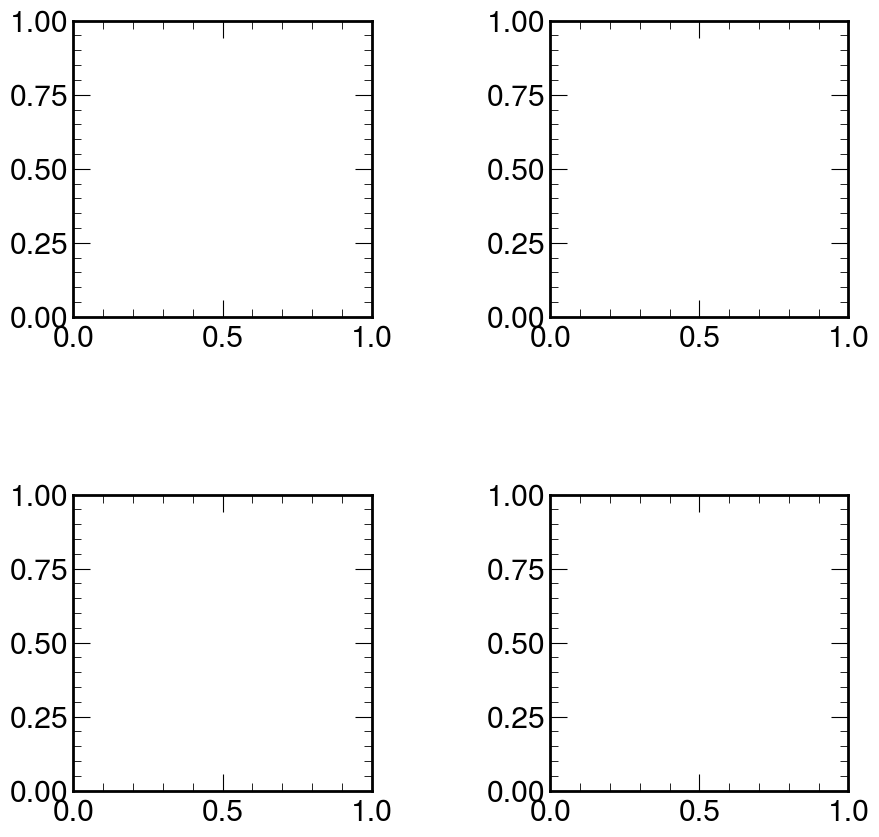

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.6, hspace=0.6)

labels = {
    "no" : "Nothing",
    "all" : "All",
}

colours = {
    "no" : "#1874CD", 
    "all" : "#00BFFF",
}

titles = {
    0 : "All",
    3 : "Non",
    2 : "W",
    1 : "Top",
}

thing = "met"
var = "pt"

row, column = 0, 0

for i, cat in enumerate([0, 3, 2, 1]):
    
    if i == 2:
        row = 1
        column = 0
    
    if i == 0:
        h_no = out[thing].project("region", var, "cat")[{"region" : hist.loc("noselection"), "cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]}][{"cat" : sum}]
        h_all = out[thing].project("region", var, "cat")[{"region" : hist.loc("all"), "cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]}][{"cat" : sum}]
    else:
        h_no = out[thing].project("region", var, "cat")[hist.loc("noselection"), :, hist.loc(cat)]
        h_all = out[thing].project("region", var, "cat")[hist.loc("all"), :, hist.loc(cat)]
    
    n_no = h_no[slice(hist.underflow+1, hist.overflow-1,sum)].value
    n_all = h_all[slice(hist.underflow+1, hist.overflow-1,sum)].value
            
    mplhep.histplot(h_no, ax=ax[row, column], color=colours["no"], label=f"Nothing ({n_no:,.0f})", yerr=False, histtype='fill', alpha=1,)
    mplhep.histplot(h_all, ax=ax[row, column], color=colours["all"], label=f"All ({n_all:,.0f})", yerr=False, histtype='fill', alpha=1,)
    ax[row, column].axvline(50, color='red',ls='--', label=f"> 50 ({n_all/n_no * 100:,.2f} %)")

    ax[row, column].legend(loc='best', fontsize=12)
    ax[row, column].set_title(titles[cat], fontsize=20)
    
    column += 1

In [14]:
def get_edge(h, cut, edge=-1):
    idx = -1 if edge < 0 else 1
    return h.axes[0].edges[[i for i, x in enumerate(h.axes[0].edges - cut) if x > 0][0] + edge]

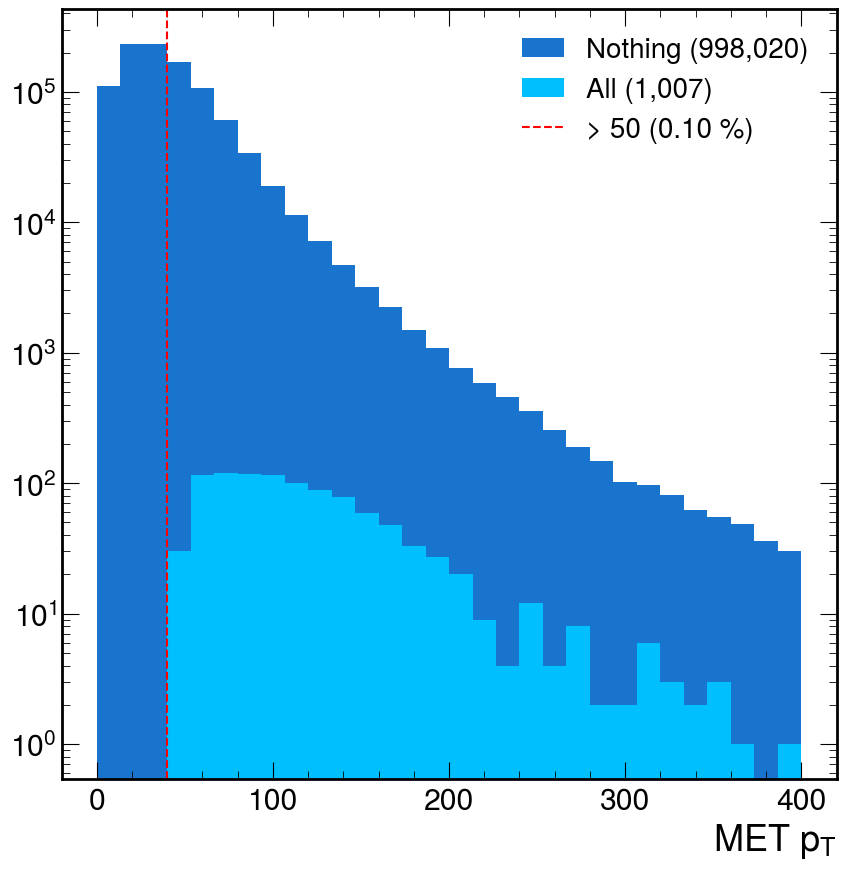

In [15]:
fig, ax = plt.subplots(figsize=(10,10))

labels = {
    "no" : "Nothing",
    "all" : "All",
}

colours = {
    "no" : "#1874CD", 
    "all" : "#00BFFF",
}

thing = "met"
var = "pt"

h_no = out[thing].project("region", var)[{"region" : hist.loc("noselection")}]
h_all = out[thing].project("region", var)[{"region" : hist.loc("nobtag")}]

n_no = h_no[slice(hist.underflow+1, hist.overflow-1,sum)].value
n_all = h_all[slice(hist.underflow+1, hist.overflow-1,sum)].value

mplhep.histplot(h_no, ax=ax, color=colours["no"], label=f"Nothing ({n_no:,.0f})", yerr=False, histtype='fill', alpha=1,)
mplhep.histplot(h_all, ax=ax, color=colours["all"], label=f"All ({n_all:,.0f})", yerr=False, histtype='fill', alpha=1,)
ax.axvline(get_edge(h_all, 50), color='red',ls='--', label=f"> 50 ({n_all/n_no * 100:,.2f} %)")

ax.set_yscale("log")

ax.legend(loc='best', fontsize=20)

In [1]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.6, hspace=0.6)

labels = {
    "no" : "Nothing",
    "all" : "All",
}

colours = {
    "no" : "#1874CD", 
    "all" : "#00BFFF",
}

titles = {
    0 : "All",
    3 : "Non",
    2 : "W",
    1 : "Top",
}

thing = "goodmuon"
var = "pt"

row, column = 0, 0

for i, cat in enumerate([0, 3, 2, 1]):
    
    if i == 2:
        row = 1
        column = 0
    
    if i == 0:
        h_no = out[thing].project("region", var, "cat")[{"region" : hist.loc("noselection"), "cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]}][{"cat" : sum}]
        h_all = out[thing].project("region", var, "cat")[{"region" : hist.loc("all"), "cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]}][{"cat" : sum}]
    else:
        h_no = out[thing].project("region", var, "cat")[hist.loc("noselection"), :, hist.loc(cat)]
        h_all = out[thing].project("region", var, "cat")[hist.loc("all"), :, hist.loc(cat)]
    
    n_no = h_no[slice(hist.underflow+1, hist.overflow-1,sum)].value
    n_all = h_all[slice(hist.underflow+1, hist.overflow-1,sum)].value
            
    mplhep.histplot(h_no, ax=ax[row, column], color=colours["no"], label=f"Nothing ({n_no:,.0f})", yerr=False, histtype='fill', alpha=1,)
    mplhep.histplot(h_all, ax=ax[row, column], color=colours["all"], label=f"All ({n_all:,.0f})", yerr=False, histtype='fill', alpha=1,)
    ax[row, column].axvline(55, color='red',ls='--', label=f"> 55 ({n_all/n_no * 100:,.2f} %)")

    ax[row, column].legend(loc='best', fontsize=12)
    ax[row, column].set_title(titles[cat], fontsize=20)
    ax[row, column].set_yscale("log")
    
    column += 1

NameError: name 'plt' is not defined

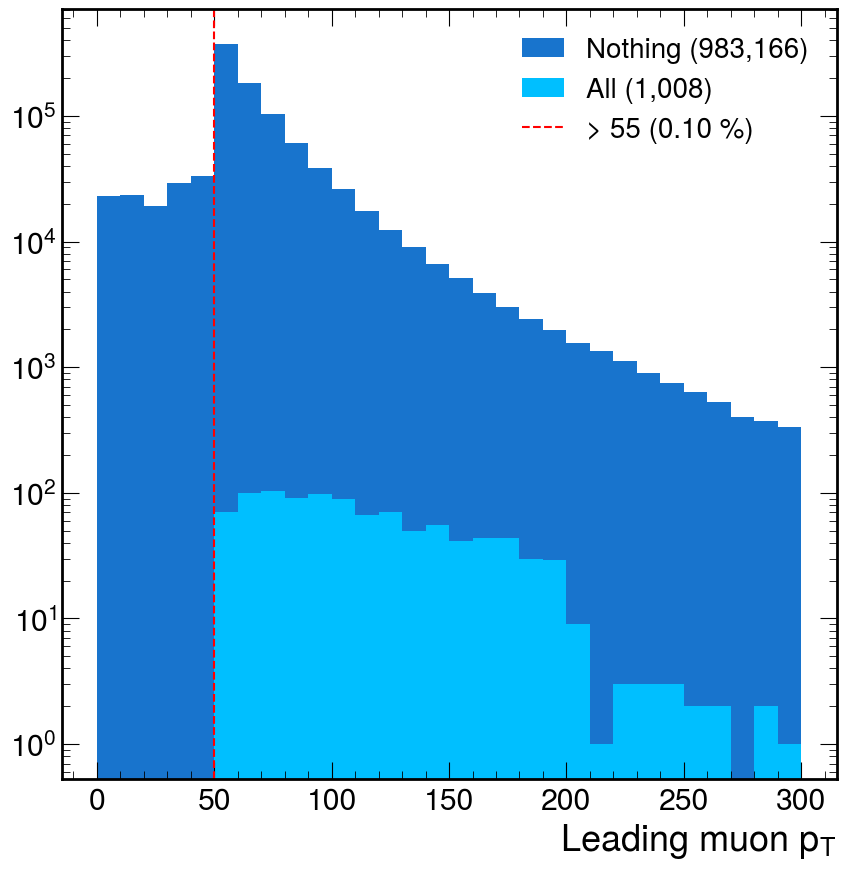

In [11]:
fig, ax = plt.subplots(figsize=(10,10))

labels = {
    "no" : "Nothing",
    "all" : "All",
}

colours = {
    "no" : "#1874CD", 
    "all" : "#00BFFF",
}

thing = "goodmuon"
var = "pt"

h_no = out[thing].project("region", var)[{"region" : hist.loc("noselection")}]
h_all = out[thing].project("region", var)[{"region" : hist.loc("nobtag")}]

n_no = h_no[slice(hist.underflow+1, hist.overflow-1,sum)].value
n_all = h_all[slice(hist.underflow+1, hist.overflow-1,sum)].value

mplhep.histplot(h_no, ax=ax, color=colours["no"], label=f"Nothing ({n_no:,.0f})", yerr=False, histtype='fill', alpha=1,)
mplhep.histplot(h_all, ax=ax, color=colours["all"], label=f"All ({n_all:,.0f})", yerr=False, histtype='fill', alpha=1,)
ax.axvline(get_edge(h_all, 55), color='red',ls='--', label=f"> 55 ({n_all/n_no * 100:,.2f} %)")

ax.set_yscale("log")

ax.legend(loc='best', fontsize=20)

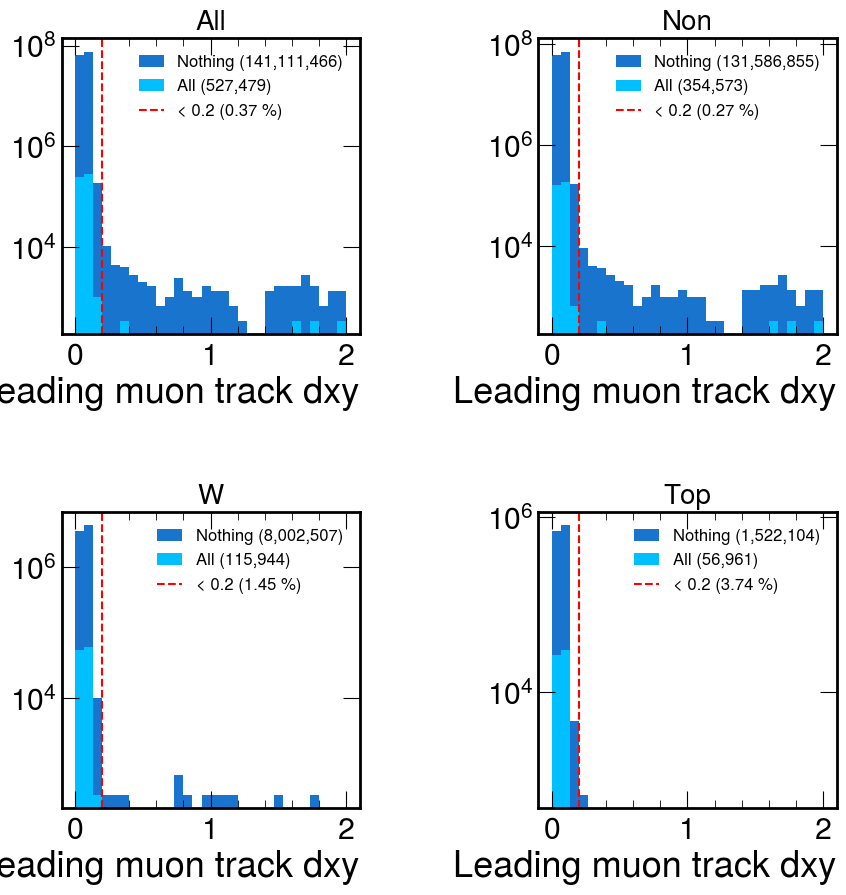

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.6, hspace=0.6)

labels = {
    "no" : "Nothing",
    "all" : "All",
}

colours = {
    "no" : "#1874CD", 
    "all" : "#00BFFF",
}

titles = {
    0 : "All",
    3 : "Non",
    2 : "W",
    1 : "Top",
}

thing = "goodmuon"
var = "trk_dxy"

row, column = 0, 0

for i, cat in enumerate([0, 3, 2, 1]):
    
    if i == 2:
        row = 1
        column = 0
    
    if i == 0:
        h_no = out[thing].project("region", var, "cat")[{"region" : hist.loc("noselection"), "cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]}][{"cat" : sum}]
        h_all = out[thing].project("region", var, "cat")[{"region" : hist.loc("all"), "cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]}][{"cat" : sum}]
    else:
        h_no = out[thing].project("region", var, "cat")[hist.loc("noselection"), :, hist.loc(cat)]
        h_all = out[thing].project("region", var, "cat")[hist.loc("all"), :, hist.loc(cat)]
    
    n_no = h_no[slice(hist.underflow+1, hist.overflow-1,sum)].value
    n_all = h_all[slice(hist.underflow+1, hist.overflow-1,sum)].value
            
    mplhep.histplot(h_no, ax=ax[row, column], color=colours["no"], label=f"Nothing ({n_no:,.0f})", yerr=False, histtype='fill', alpha=1,)
    mplhep.histplot(h_all, ax=ax[row, column], color=colours["all"], label=f"All ({n_all:,.0f})", yerr=False, histtype='fill', alpha=1,)
    ax[row, column].axvline(0.2, color='red',ls='--', label=f"< 0.2 ({n_all/n_no * 100:,.2f} %)")

    ax[row, column].legend(loc='best', fontsize=12)
    ax[row, column].set_title(titles[cat], fontsize=20)
    ax[row, column].set_yscale("log")
    
    column += 1

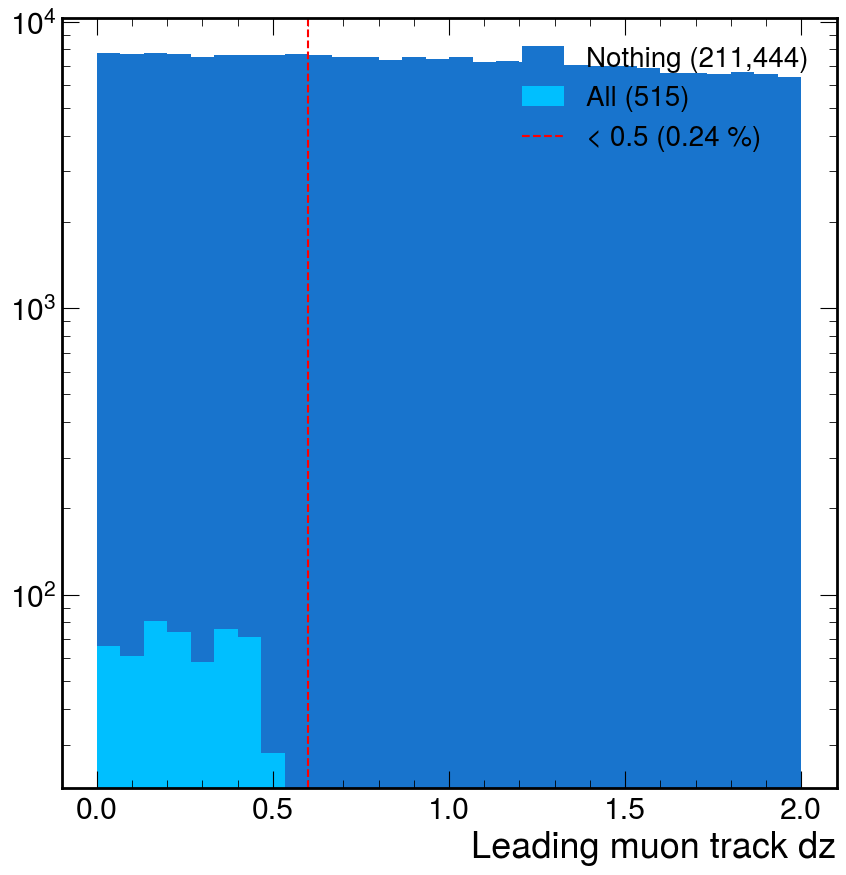

In [16]:
fig, ax = plt.subplots(figsize=(10,10))

labels = {
    "no" : "Nothing",
    "all" : "All",
}

colours = {
    "no" : "#1874CD", 
    "all" : "#00BFFF",
}

thing = "goodmuon"
var = "trk_dz"

h_no = out[thing].project("region", var)[{"region" : hist.loc("noselection")}]
h_all = out[thing].project("region", var)[{"region" : hist.loc("nobtag")}]

n_no = h_no[slice(hist.underflow+1, hist.overflow-1,sum)].value
n_all = h_all[slice(hist.underflow+1, hist.overflow-1,sum)].value

mplhep.histplot(h_no, ax=ax, color=colours["no"], label=f"Nothing ({n_no:,.0f})", yerr=False, histtype='fill', alpha=1,)
mplhep.histplot(h_all, ax=ax, color=colours["all"], label=f"All ({n_all:,.0f})", yerr=False, histtype='fill', alpha=1,)
ax.axvline(get_edge(h_all, 0.5, 1), color='red',ls='--', label=f"< 0.5 ({n_all/n_no * 100:,.2f} %)")

ax.set_yscale("log")

ax.legend(loc='best', fontsize=20)

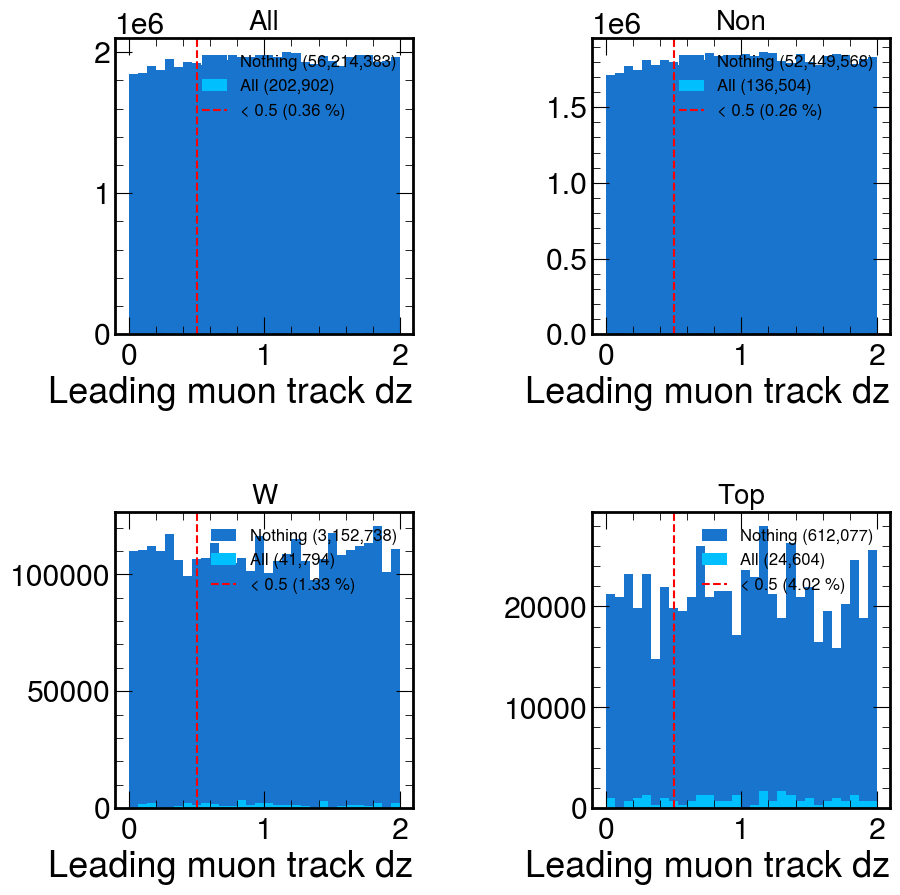

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.6, hspace=0.6)

labels = {
    "no" : "Nothing",
    "all" : "All",
}

colours = {
    "no" : "#1874CD", 
    "all" : "#00BFFF",
}

titles = {
    0 : "All",
    3 : "Non",
    2 : "W",
    1 : "Top",
}

thing = "goodmuon"
var = "trk_dz"

row, column = 0, 0

for i, cat in enumerate([0, 3, 2, 1]):
    
    if i == 2:
        row = 1
        column = 0
    
    if i == 0:
        h_no = out[thing].project("region", var, "cat")[{"region" : hist.loc("noselection"), "cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]}][{"cat" : sum}]
        h_all = out[thing].project("region", var, "cat")[{"region" : hist.loc("all"), "cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]}][{"cat" : sum}]
    else:
        h_no = out[thing].project("region", var, "cat")[hist.loc("noselection"), :, hist.loc(cat)]
        h_all = out[thing].project("region", var, "cat")[hist.loc("all"), :, hist.loc(cat)]
    
    n_no = h_no[slice(hist.underflow+1, hist.overflow-1,sum)].value
    n_all = h_all[slice(hist.underflow+1, hist.overflow-1,sum)].value
            
    mplhep.histplot(h_no, ax=ax[row, column], color=colours["no"], label=f"Nothing ({n_no:,.0f})", yerr=False, histtype='fill', alpha=1,)
    mplhep.histplot(h_all, ax=ax[row, column], color=colours["all"], label=f"All ({n_all:,.0f})", yerr=False, histtype='fill', alpha=1,)
    ax[row, column].axvline(0.5, color='red',ls='--', label=f"< 0.5 ({n_all/n_no * 100:,.2f} %)")

    ax[row, column].legend(loc='best', fontsize=12)
    ax[row, column].set_title(titles[cat], fontsize=20)
    
    column += 1

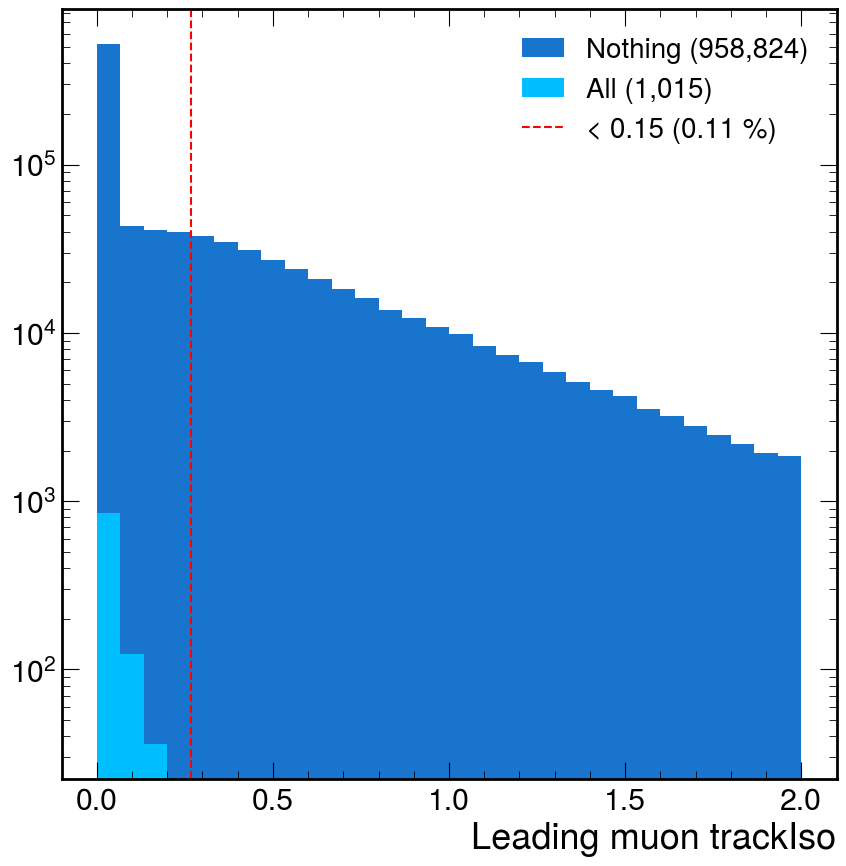

In [19]:
fig, ax = plt.subplots(figsize=(10,10))

labels = {
    "no" : "Nothing",
    "all" : "All",
}

colours = {
    "no" : "#1874CD", 
    "all" : "#00BFFF",
}

thing = "goodmuon"
var = "trackIso"

h_no = out[thing].project("region", var)[{"region" : hist.loc("noselection")}]
h_all = out[thing].project("region", var)[{"region" : hist.loc("nobtag")}]

n_no = h_no[slice(hist.underflow+1, hist.overflow-1,sum)].value
n_all = h_all[slice(hist.underflow+1, hist.overflow-1,sum)].value

mplhep.histplot(h_no, ax=ax, color=colours["no"], label=f"Nothing ({n_no:,.0f})", yerr=False, histtype='fill', alpha=1,)
mplhep.histplot(h_all, ax=ax, color=colours["all"], label=f"All ({n_all:,.0f})", yerr=False, histtype='fill', alpha=1,)
ax.axvline(get_edge(h_all, 0.15, 1), color='red',ls='--', label=f"< 0.15 ({n_all/n_no * 100:,.2f} %)")

ax.set_yscale("log")

ax.legend(loc='best', fontsize=20)

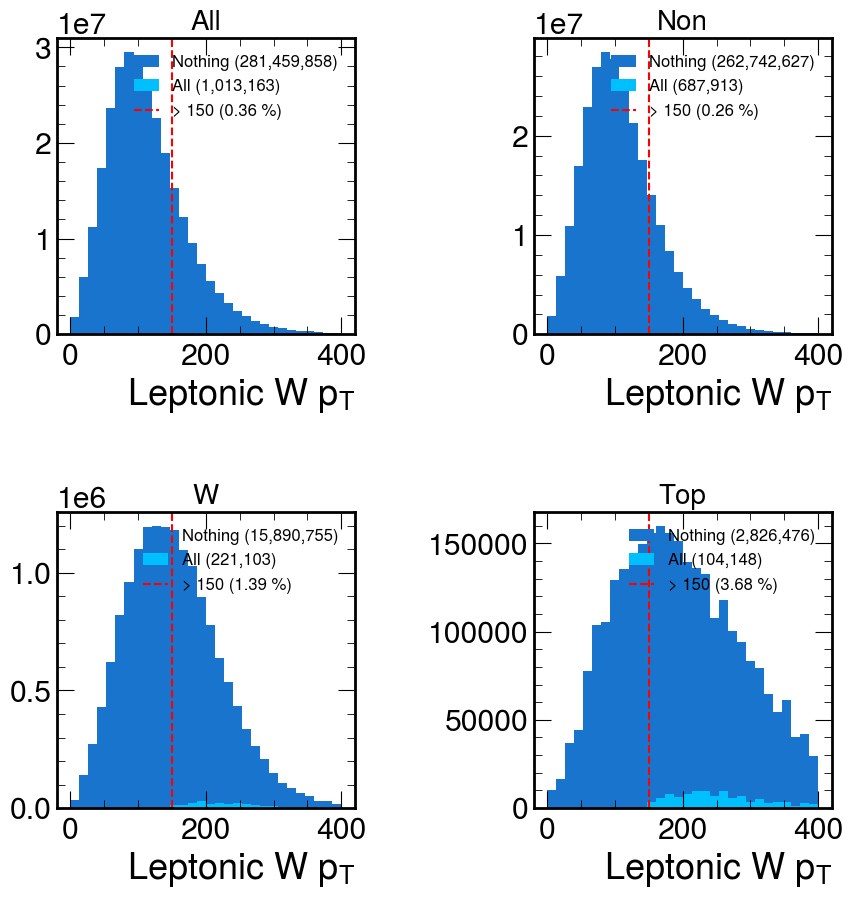

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.6, hspace=0.6)

labels = {
    "no" : "Nothing",
    "all" : "All",
}

colours = {
    "no" : "#1874CD", 
    "all" : "#00BFFF",
}

titles = {
    0 : "All",
    3 : "Non",
    2 : "W",
    1 : "Top",
}

thing = "leptonicW"
var = "pt"

row, column = 0, 0

for i, cat in enumerate([0, 3, 2, 1]):
    
    if i == 2:
        row = 1
        column = 0
    
    if i == 0:
        h_no = out[thing].project("region", var, "cat")[{"region" : hist.loc("noselection"), "cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]}][{"cat" : sum}]
        h_all = out[thing].project("region", var, "cat")[{"region" : hist.loc("all"), "cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]}][{"cat" : sum}]
    else:
        h_no = out[thing].project("region", var, "cat")[hist.loc("noselection"), :, hist.loc(cat)]
        h_all = out[thing].project("region", var, "cat")[hist.loc("all"), :, hist.loc(cat)]
    
    n_no = h_no[slice(hist.underflow+1, hist.overflow-1,sum)].value
    n_all = h_all[slice(hist.underflow+1, hist.overflow-1,sum)].value
            
    mplhep.histplot(h_no, ax=ax[row, column], color=colours["no"], label=f"Nothing ({n_no:,.0f})", yerr=False, histtype='fill', alpha=1,)
    mplhep.histplot(h_all, ax=ax[row, column], color=colours["all"], label=f"All ({n_all:,.0f})", yerr=False, histtype='fill', alpha=1,)
    ax[row, column].axvline(150, color='red',ls='--', label=f"> 150 ({n_all/n_no * 100:,.2f} %)")

    ax[row, column].legend(loc='best', fontsize=12)
    ax[row, column].set_title(titles[cat], fontsize=20)
    
    column += 1

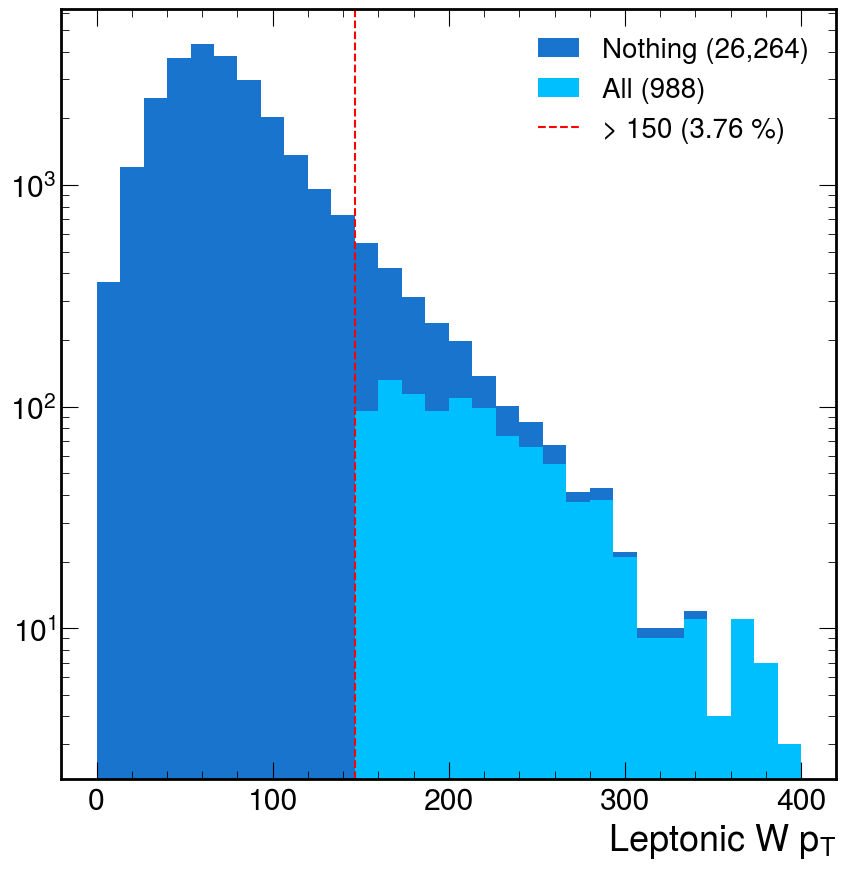

In [20]:
fig, ax = plt.subplots(figsize=(10,10))

labels = {
    "no" : "Nothing",
    "all" : "All",
}

colours = {
    "no" : "#1874CD", 
    "all" : "#00BFFF",
}

thing = "leptonicW"
var = "pt"

h_no = out[thing].project("region", var)[{"region" : hist.loc("noselection")}]
h_all = out[thing].project("region", var)[{"region" : hist.loc("nobtag")}]

n_no = h_no[slice(hist.underflow+1, hist.overflow-1,sum)].value
n_all = h_all[slice(hist.underflow+1, hist.overflow-1,sum)].value

mplhep.histplot(h_no, ax=ax, color=colours["no"], label=f"Nothing ({n_no:,.0f})", yerr=False, histtype='fill', alpha=1,)
mplhep.histplot(h_all, ax=ax, color=colours["all"], label=f"All ({n_all:,.0f})", yerr=False, histtype='fill', alpha=1,)
ax.axvline(get_edge(h_all, 150), color='red',ls='--', label=f"> 150 ({n_all/n_no * 100:,.2f} %)")

ax.set_yscale("log")

ax.legend(loc='best', fontsize=20)

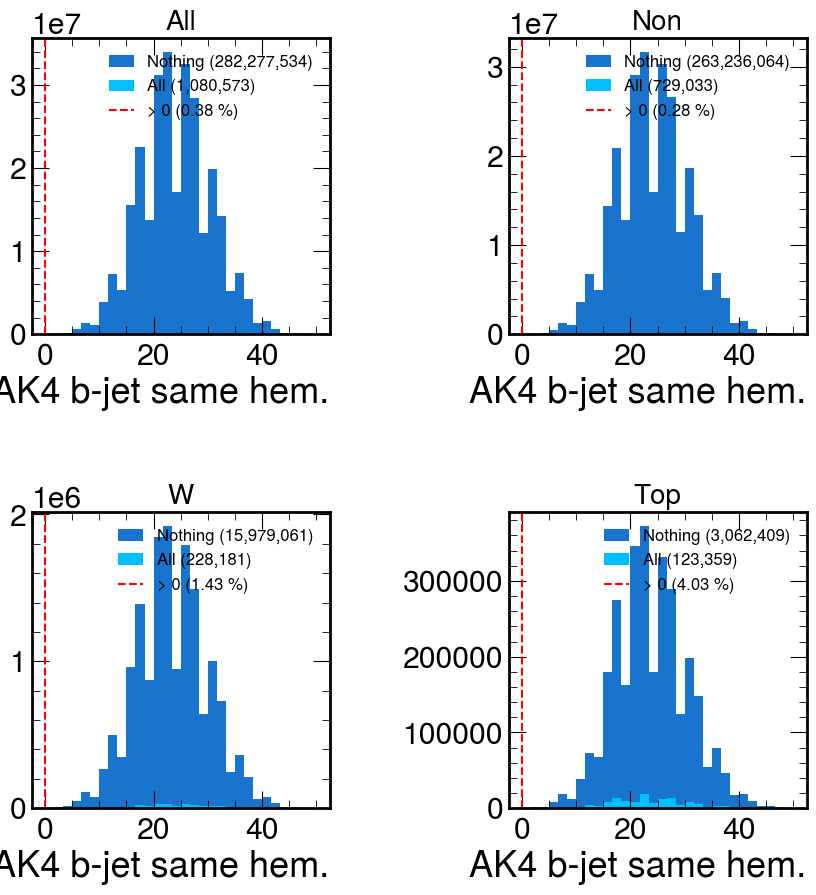

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.6, hspace=0.6)

labels = {
    "no" : "Nothing",
    "all" : "All",
}

colours = {
    "no" : "#1874CD", 
    "all" : "#00BFFF",
}

titles = {
    0 : "All",
    3 : "Non",
    2 : "W",
    1 : "Top",
}

thing = "ak4bjet"
var = "njets"

row, column = 0, 0

for i, cat in enumerate([0, 3, 2, 1]):
    
    if i == 2:
        row = 1
        column = 0
    
    if i == 0:
        h_no = out[thing].project("region", var, "cat")[{"region" : hist.loc("noselection"), "cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]}][{"cat" : sum}]
        h_all = out[thing].project("region", var, "cat")[{"region" : hist.loc("all"), "cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]}][{"cat" : sum}]
    else:
        h_no = out[thing].project("region", var, "cat")[hist.loc("noselection"), :, hist.loc(cat)]
        h_all = out[thing].project("region", var, "cat")[hist.loc("all"), :, hist.loc(cat)]
    
    n_no = h_no[slice(hist.underflow+1, hist.overflow-1,sum)].value
    n_all = h_all[slice(hist.underflow+1, hist.overflow-1,sum)].value
            
    mplhep.histplot(h_no, ax=ax[row, column], color=colours["no"], label=f"Nothing ({n_no:,.0f})", yerr=False, histtype='fill', alpha=1,)
    mplhep.histplot(h_all, ax=ax[row, column], color=colours["all"], label=f"All ({n_all:,.0f})", yerr=False, histtype='fill', alpha=1,)
    ax[row, column].axvline(0, color='red',ls='--', label=f"> 0 ({n_all/n_no * 100:,.2f} %)")

    ax[row, column].legend(loc='best', fontsize=12)
    ax[row, column].set_title(titles[cat], fontsize=20)
    ax[row, column].set_xlabel("AK4 b-jet same hem.")
    
    column += 1

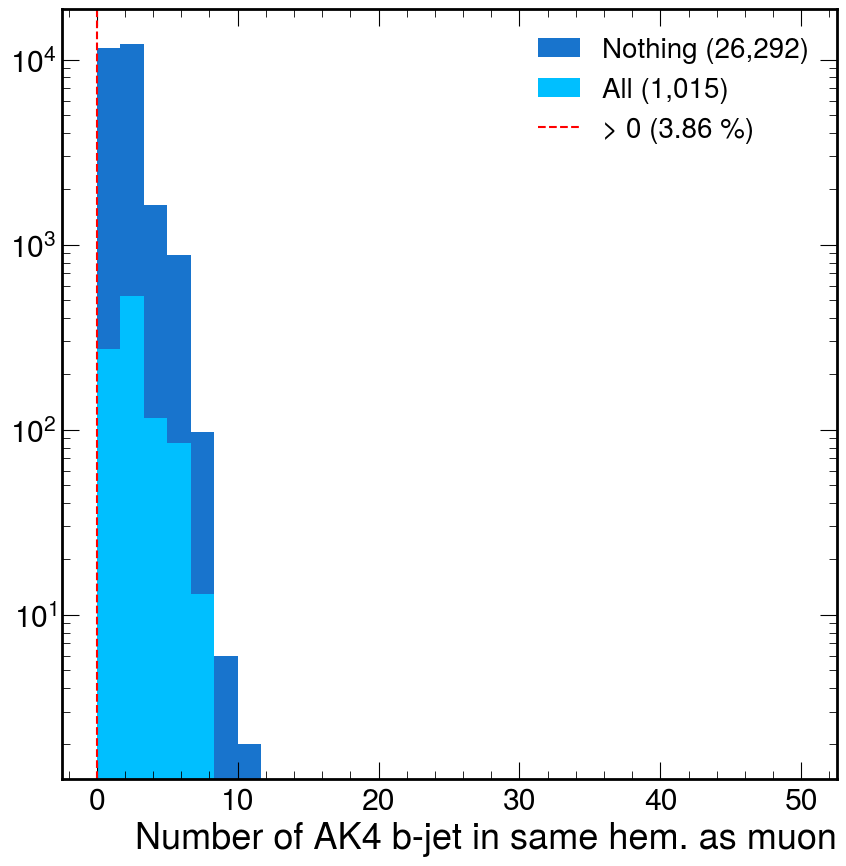

In [21]:
fig, ax = plt.subplots(figsize=(10,10))

labels = {
    "no" : "Nothing",
    "all" : "All",
}

colours = {
    "no" : "#1874CD", 
    "all" : "#00BFFF",
}

thing = "ak4bjet"
var = "njets"

h_no = out[thing].project("region", var)[{"region" : hist.loc("noselection")}]
h_all = out[thing].project("region", var)[{"region" : hist.loc("nobtag")}]

n_no = h_no[slice(hist.underflow+1, hist.overflow-1,sum)].value
n_all = h_all[slice(hist.underflow+1, hist.overflow-1,sum)].value

mplhep.histplot(h_no, ax=ax, color=colours["no"], label=f"Nothing ({n_no:,.0f})", yerr=False, histtype='fill', alpha=1,)
mplhep.histplot(h_all, ax=ax, color=colours["all"], label=f"All ({n_all:,.0f})", yerr=False, histtype='fill', alpha=1,)
ax.axvline(get_edge(h_all, 0), color='red',ls='--', label=f"> 0 ({n_all/n_no * 100:,.2f} %)")

ax.set_yscale("log")

ax.legend(loc='best', fontsize=20)

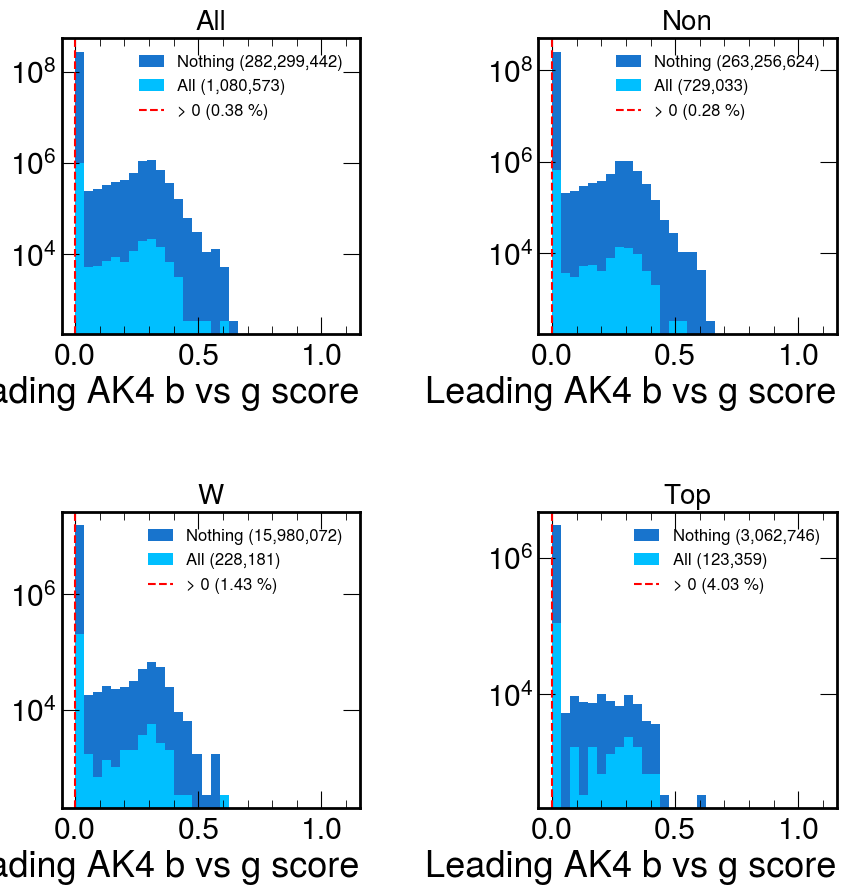

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.6, hspace=0.6)

labels = {
    "no" : "Nothing",
    "all" : "All",
}

colours = {
    "no" : "#1874CD", 
    "all" : "#00BFFF",
}

titles = {
    0 : "All",
    3 : "Non",
    2 : "W",
    1 : "Top",
}

thing = "ak4bjet"
var = "pn_b_1"

row, column = 0, 0

for i, cat in enumerate([0, 3, 2, 1]):
    
    if i == 2:
        row = 1
        column = 0
    
    if i == 0:
        h_no = out[thing].project("region", var, "cat")[{"region" : hist.loc("noselection"), "cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]}][{"cat" : sum}]
        h_all = out[thing].project("region", var, "cat")[{"region" : hist.loc("all"), "cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]}][{"cat" : sum}]
    else:
        h_no = out[thing].project("region", var, "cat")[hist.loc("noselection"), :, hist.loc(cat)]
        h_all = out[thing].project("region", var, "cat")[hist.loc("all"), :, hist.loc(cat)]
    
    n_no = h_no[slice(hist.underflow+1, hist.overflow-1,sum)].value
    n_all = h_all[slice(hist.underflow+1, hist.overflow-1,sum)].value
            
    mplhep.histplot(h_no, ax=ax[row, column], color=colours["no"], label=f"Nothing ({n_no:,.0f})", yerr=False, histtype='fill', alpha=1,)
    mplhep.histplot(h_all, ax=ax[row, column], color=colours["all"], label=f"All ({n_all:,.0f})", yerr=False, histtype='fill', alpha=1,)
    ax[row, column].axvline(0, color='red',ls='--', label=f"> 0 ({n_all/n_no * 100:,.2f} %)")

    ax[row, column].legend(loc='best', fontsize=12)
    ax[row, column].set_title(titles[cat], fontsize=20)
    ax[row, column].set_yscale("log")
    
    column += 1

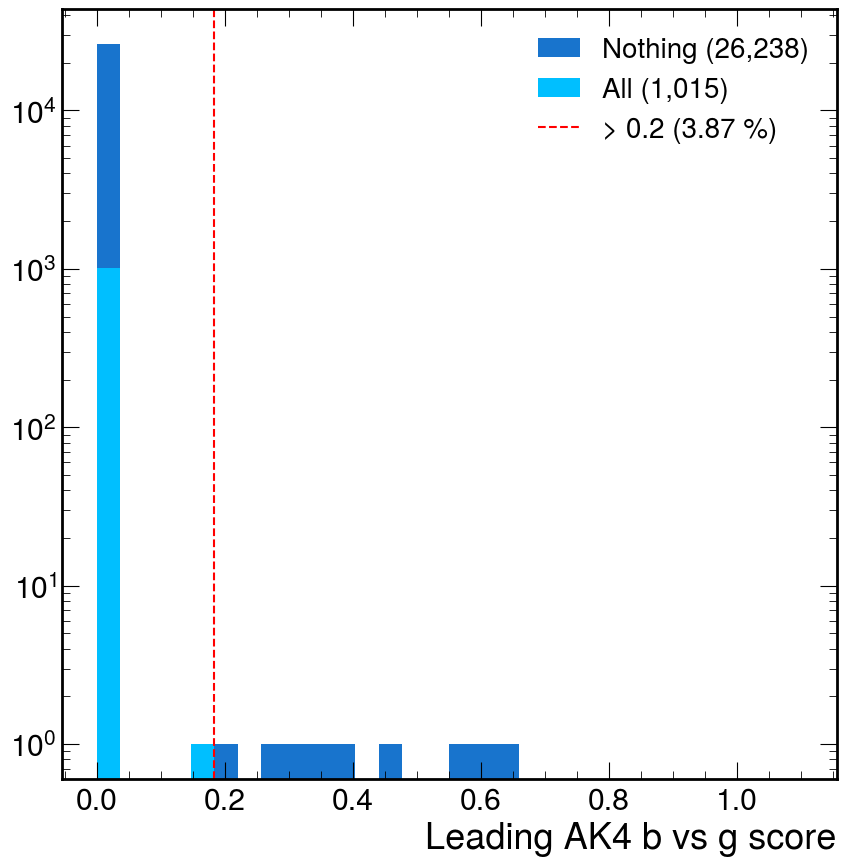

In [22]:
fig, ax = plt.subplots(figsize=(10,10))

labels = {
    "no" : "Nothing",
    "all" : "All",
}

colours = {
    "no" : "#1874CD", 
    "all" : "#00BFFF",
}

thing = "ak4bjet"
var = "pn_b_1"

h_no = out[thing].project("region", var)[{"region" : hist.loc("noselection")}]
h_all = out[thing].project("region", var)[{"region" : hist.loc("nobtag")}]

n_no = h_no[slice(hist.underflow+1, hist.overflow-1,sum)].value
n_all = h_all[slice(hist.underflow+1, hist.overflow-1,sum)].value

mplhep.histplot(h_no, ax=ax, color=colours["no"], label=f"Nothing ({n_no:,.0f})", yerr=False, histtype='fill', alpha=1,)
mplhep.histplot(h_all, ax=ax, color=colours["all"], label=f"All ({n_all:,.0f})", yerr=False, histtype='fill', alpha=1,)
ax.axvline(get_edge(h_all, 0.2), color='red',ls='--', label=f"> 0.2 ({n_all/n_no * 100:,.2f} %)")

ax.set_yscale("log")

ax.legend(loc='best', fontsize=20)

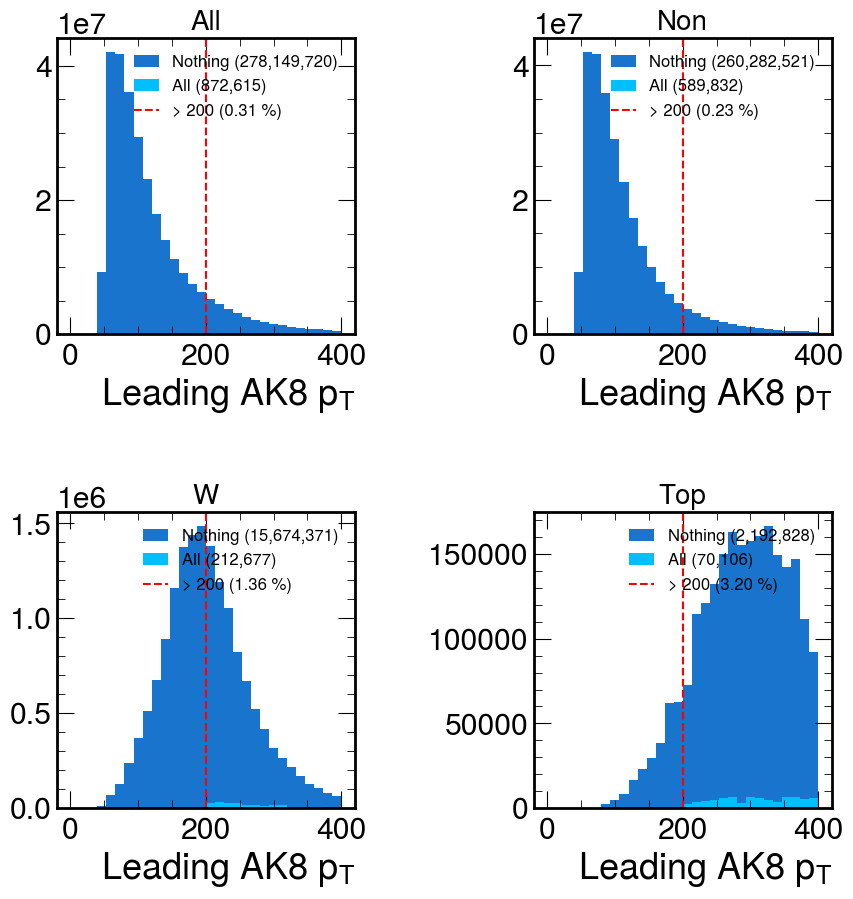

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.6, hspace=0.6)

labels = {
    "no" : "Nothing",
    "all" : "All",
}

colours = {
    "no" : "#1874CD", 
    "all" : "#00BFFF",
}

titles = {
    0 : "All",
    3 : "Non",
    2 : "W",
    1 : "Top",
}

thing = "ak8jet"
var = "pt"

row, column = 0, 0

for i, cat in enumerate([0, 3, 2, 1]):
    
    if i == 2:
        row = 1
        column = 0
    
    if i == 0:
        h_no = out[thing].project("region", var, "cat")[{"region" : hist.loc("noselection"), "cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]}][{"cat" : sum}]
        h_all = out[thing].project("region", var, "cat")[{"region" : hist.loc("all"), "cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]}][{"cat" : sum}]
    else:
        h_no = out[thing].project("region", var, "cat")[hist.loc("noselection"), :, hist.loc(cat)]
        h_all = out[thing].project("region", var, "cat")[hist.loc("all"), :, hist.loc(cat)]
    
    n_no = h_no[slice(hist.underflow+1, hist.overflow-1,sum)].value
    n_all = h_all[slice(hist.underflow+1, hist.overflow-1,sum)].value
            
    mplhep.histplot(h_no, ax=ax[row, column], color=colours["no"], label=f"Nothing ({n_no:,.0f})", yerr=False, histtype='fill', alpha=1,)
    mplhep.histplot(h_all, ax=ax[row, column], color=colours["all"], label=f"All ({n_all:,.0f})", yerr=False, histtype='fill', alpha=1,)
    ax[row, column].axvline(200, color='red',ls='--', label=f"> 200 ({n_all/n_no * 100:,.2f} %)")

    ax[row, column].legend(loc='best', fontsize=12)
    ax[row, column].set_title(titles[cat], fontsize=20)
    
    column += 1

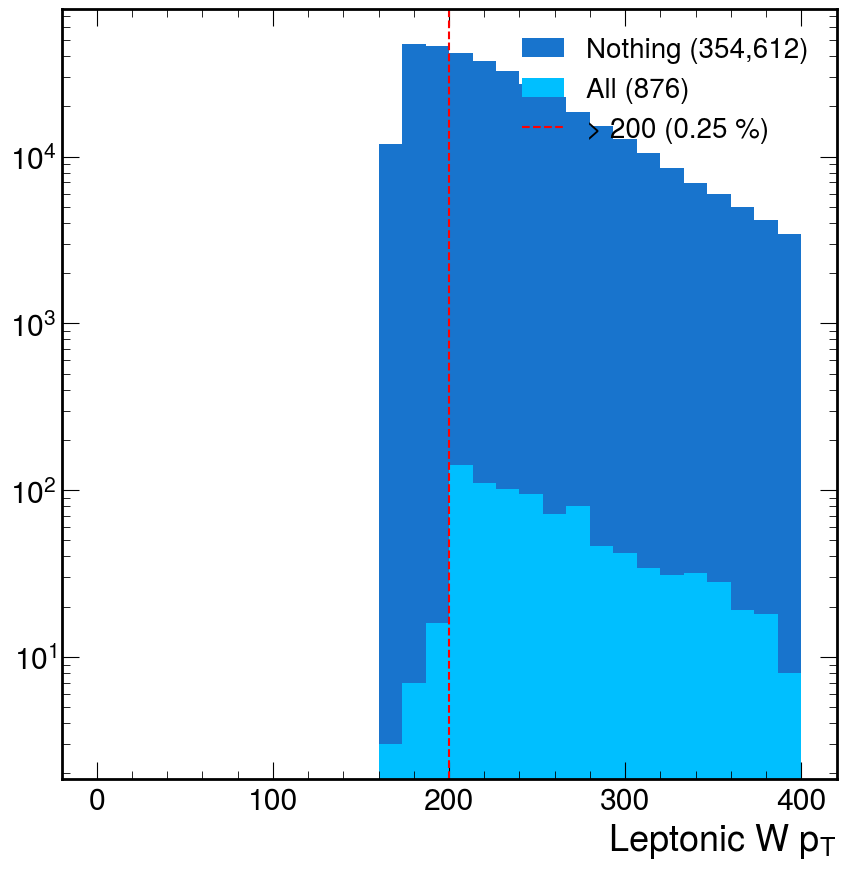

In [23]:
fig, ax = plt.subplots(figsize=(10,10))

labels = {
    "no" : "Nothing",
    "all" : "All",
}

colours = {
    "no" : "#1874CD", 
    "all" : "#00BFFF",
}

thing = "ak8jet"
var = "pt"

h_no = out[thing].project("region", var)[{"region" : hist.loc("noselection")}]
h_all = out[thing].project("region", var)[{"region" : hist.loc("nobtag")}]

n_no = h_no[slice(hist.underflow+1, hist.overflow-1,sum)].value
n_all = h_all[slice(hist.underflow+1, hist.overflow-1,sum)].value

mplhep.histplot(h_no, ax=ax, color=colours["no"], label=f"Nothing ({n_no:,.0f})", yerr=False, histtype='fill', alpha=1,)
mplhep.histplot(h_all, ax=ax, color=colours["all"], label=f"All ({n_all:,.0f})", yerr=False, histtype='fill', alpha=1,)
ax.axvline(get_edge(h_all, 200), color='red',ls='--', label=f"> 200 ({n_all/n_no * 100:,.2f} %)")

ax.set_yscale("log")

ax.legend(loc='best', fontsize=20)

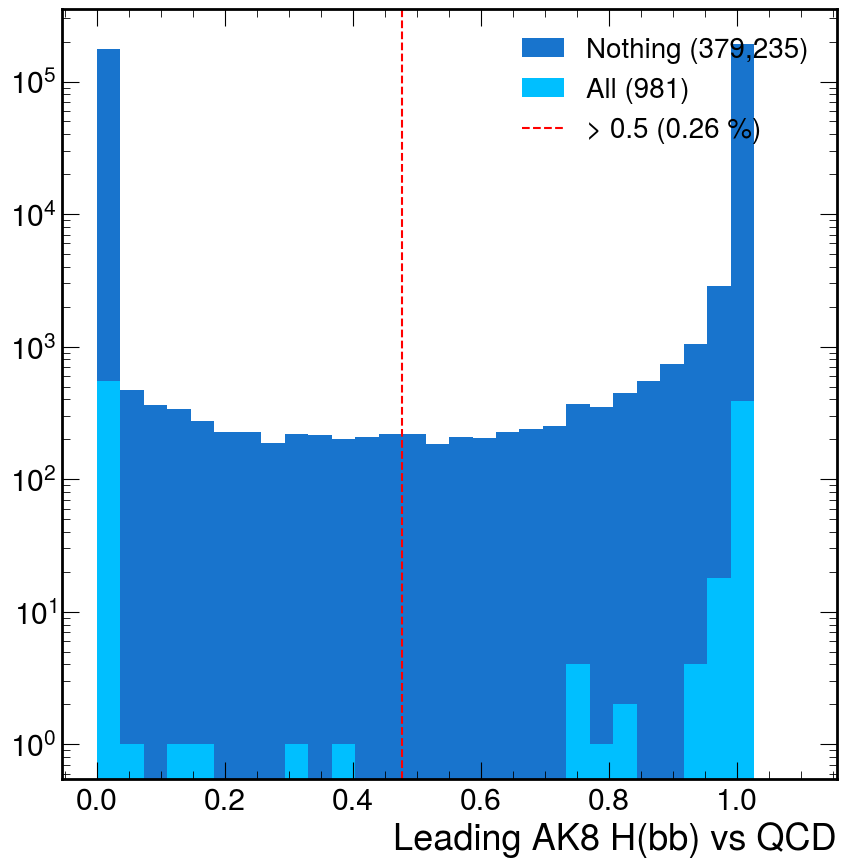

In [24]:
fig, ax = plt.subplots(figsize=(10,10))

labels = {
    "no" : "Nothing",
    "all" : "All",
}

colours = {
    "no" : "#1874CD", 
    "all" : "#00BFFF",
}

thing = "ak8jet"
var = "pn_Hbb"

h_no = out[thing].project("region", var)[{"region" : hist.loc("noselection")}]
h_all = out[thing].project("region", var)[{"region" : hist.loc("nobtag")}]

n_no = h_no[slice(hist.underflow+1, hist.overflow-1,sum)].value
n_all = h_all[slice(hist.underflow+1, hist.overflow-1,sum)].value

mplhep.histplot(h_no, ax=ax, color=colours["no"], label=f"Nothing ({n_no:,.0f})", yerr=False, histtype='fill', alpha=1,)
mplhep.histplot(h_all, ax=ax, color=colours["all"], label=f"All ({n_all:,.0f})", yerr=False, histtype='fill', alpha=1,)
ax.axvline(get_edge(h_all, 0.5), color='red',ls='--', label=f"> 0.5 ({n_all/n_no * 100:,.2f} %)")

ax.set_yscale("log")

ax.legend(loc='best', fontsize=20)

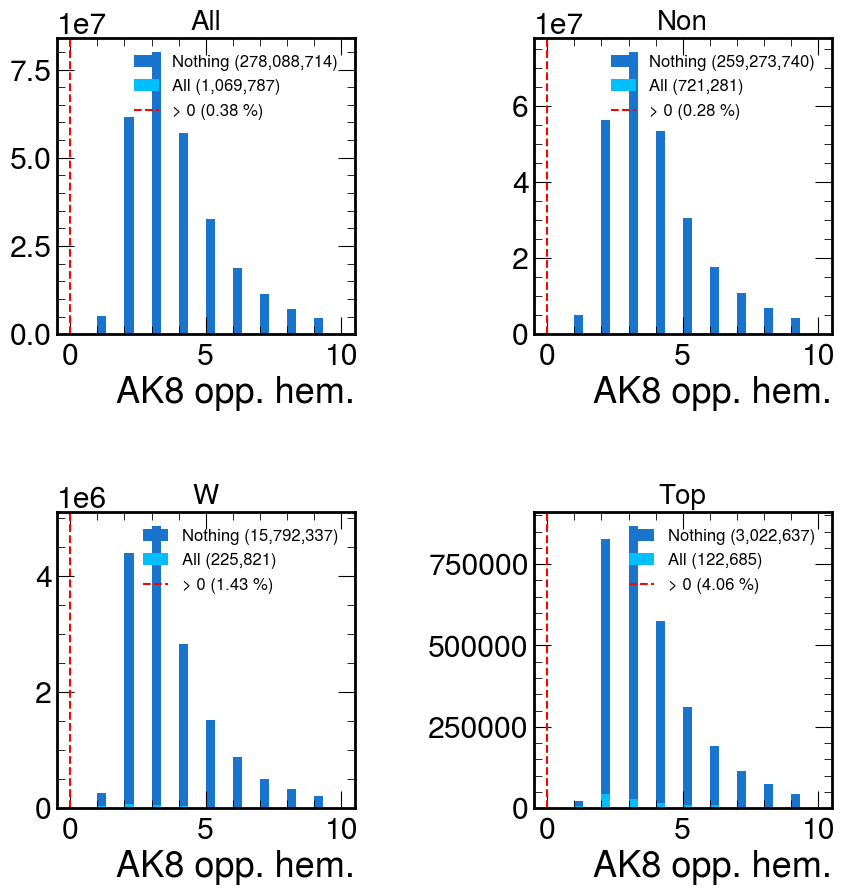

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.6, hspace=0.6)

labels = {
    "no" : "Nothing",
    "all" : "All",
}

colours = {
    "no" : "#1874CD", 
    "all" : "#00BFFF",
}

titles = {
    0 : "All",
    3 : "Non",
    2 : "W",
    1 : "Top",
}

thing = "ak8jet"
var = "njets"

row, column = 0, 0

for i, cat in enumerate([0, 3, 2, 1]):
    
    if i == 2:
        row = 1
        column = 0
    
    if i == 0:
        h_no = out[thing].project("region", var, "cat")[{"region" : hist.loc("noselection"), "cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]}][{"cat" : sum}]
        h_all = out[thing].project("region", var, "cat")[{"region" : hist.loc("all"), "cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]}][{"cat" : sum}]
    else:
        h_no = out[thing].project("region", var, "cat")[hist.loc("noselection"), :, hist.loc(cat)]
        h_all = out[thing].project("region", var, "cat")[hist.loc("all"), :, hist.loc(cat)]
    
    n_no = h_no[slice(hist.underflow+1, hist.overflow-1,sum)].value
    n_all = h_all[slice(hist.underflow+1, hist.overflow-1,sum)].value
            
    mplhep.histplot(h_no, ax=ax[row, column], color=colours["no"], label=f"Nothing ({n_no:,.0f})", yerr=False, histtype='fill', alpha=1,)
    mplhep.histplot(h_all, ax=ax[row, column], color=colours["all"], label=f"All ({n_all:,.0f})", yerr=False, histtype='fill', alpha=1,)
    ax[row, column].axvline(0, color='red',ls='--', label=f"> 0 ({n_all/n_no * 100:,.2f} %)")

    ax[row, column].legend(loc='best', fontsize=12)
    ax[row, column].set_title(titles[cat], fontsize=20)
    ax[row, column].set_xlabel("AK8 opp. hem.")
    
    column += 1

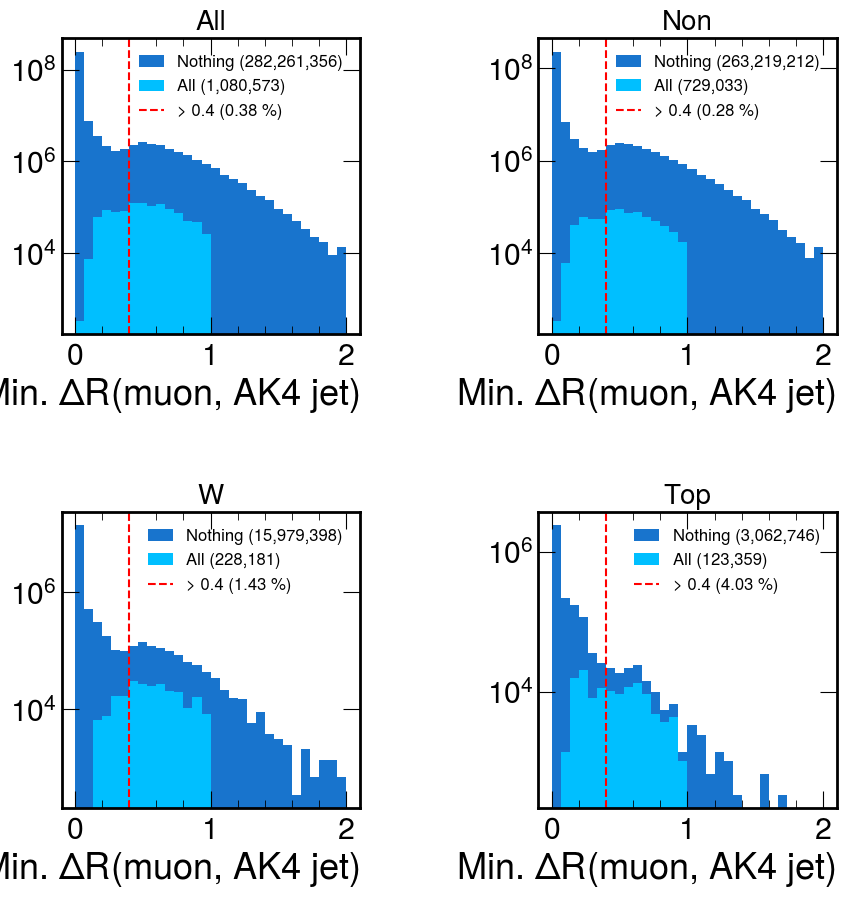

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.6, hspace=0.6)

labels = {
    "no" : "Nothing",
    "all" : "All",
}

colours = {
    "no" : "#1874CD", 
    "all" : "#00BFFF",
}

titles = {
    0 : "All",
    3 : "Non",
    2 : "W",
    1 : "Top",
}

thing = "mujetiso"
var = "dr"

row, column = 0, 0

for i, cat in enumerate([0, 3, 2, 1]):
    
    if i == 2:
        row = 1
        column = 0
    
    if i == 0:
        h_no = out[thing].project("region", var, "cat")[{"region" : hist.loc("noselection"), "cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]}][{"cat" : sum}]
        h_all = out[thing].project("region", var, "cat")[{"region" : hist.loc("all"), "cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]}][{"cat" : sum}]
    else:
        h_no = out[thing].project("region", var, "cat")[hist.loc("noselection"), :, hist.loc(cat)]
        h_all = out[thing].project("region", var, "cat")[hist.loc("all"), :, hist.loc(cat)]
    
    n_no = h_no[slice(hist.underflow+1, hist.overflow-1,sum)].value
    n_all = h_all[slice(hist.underflow+1, hist.overflow-1,sum)].value
            
    mplhep.histplot(h_no, ax=ax[row, column], color=colours["no"], label=f"Nothing ({n_no:,.0f})", yerr=False, histtype='fill', alpha=1,)
    mplhep.histplot(h_all, ax=ax[row, column], color=colours["all"], label=f"All ({n_all:,.0f})", yerr=False, histtype='fill', alpha=1,)
    ax[row, column].axvline(0.4, color='red',ls='--', label=f"> 0.4 ({n_all/n_no * 100:,.2f} %)")

    ax[row, column].legend(loc='best', fontsize=12)
    ax[row, column].set_title(titles[cat], fontsize=20)
    ax[row, column].set_yscale("log")
    
    column += 1

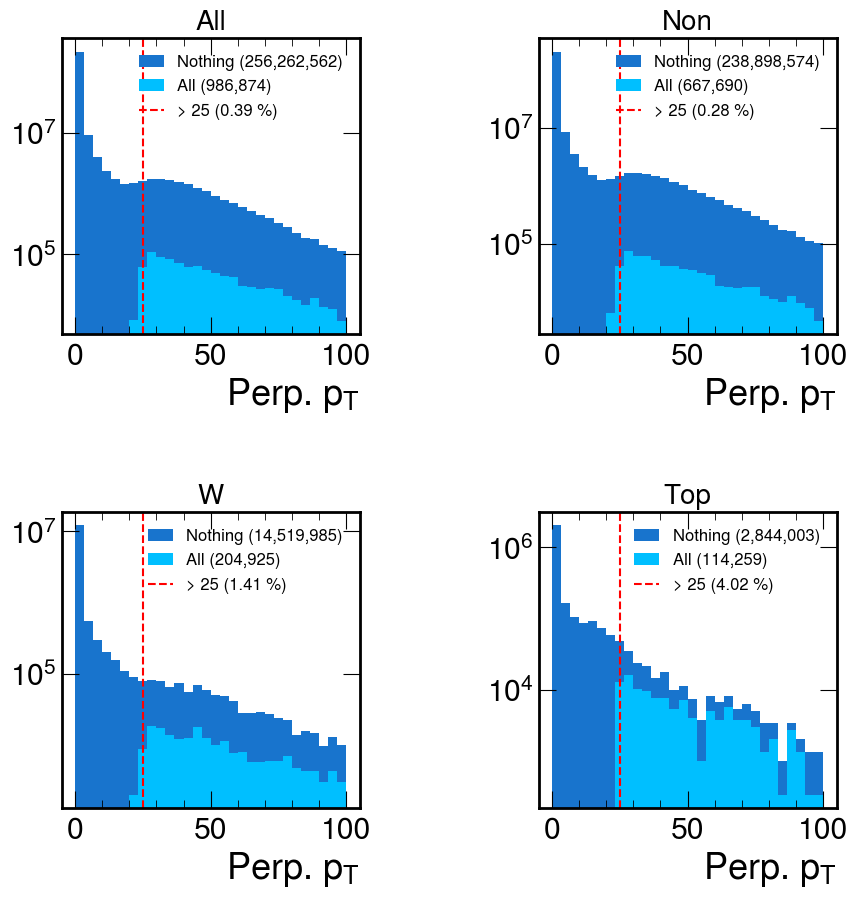

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.6, hspace=0.6)

labels = {
    "no" : "Nothing",
    "all" : "All",
}

colours = {
    "no" : "#1874CD", 
    "all" : "#00BFFF",
}

titles = {
    0 : "All",
    3 : "Non",
    2 : "W",
    1 : "Top",
}

thing = "mujetiso"
var = "pt"

row, column = 0, 0

for i, cat in enumerate([0, 3, 2, 1]):
    
    if i == 2:
        row = 1
        column = 0
    
    if i == 0:
        h_no = out[thing].project("region", var, "cat")[{"region" : hist.loc("noselection"), "cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]}][{"cat" : sum}]
        h_all = out[thing].project("region", var, "cat")[{"region" : hist.loc("all"), "cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]}][{"cat" : sum}]
    else:
        h_no = out[thing].project("region", var, "cat")[hist.loc("noselection"), :, hist.loc(cat)]
        h_all = out[thing].project("region", var, "cat")[hist.loc("all"), :, hist.loc(cat)]
    
    n_no = h_no[slice(hist.underflow+1, hist.overflow-1,sum)].value
    n_all = h_all[slice(hist.underflow+1, hist.overflow-1,sum)].value
            
    mplhep.histplot(h_no, ax=ax[row, column], color=colours["no"], label=f"Nothing ({n_no:,.0f})", yerr=False, histtype='fill', alpha=1,)
    mplhep.histplot(h_all, ax=ax[row, column], color=colours["all"], label=f"All ({n_all:,.0f})", yerr=False, histtype='fill', alpha=1,)
    ax[row, column].axvline(25, color='red',ls='--', label=f"> 25 ({n_all/n_no * 100:,.2f} %)")

    ax[row, column].legend(loc='best', fontsize=12)
    ax[row, column].set_title(titles[cat], fontsize=20)
    ax[row, column].set_xlabel(r"Perp. p$_T$")
    ax[row, column].set_yscale("log")
    
    column += 1

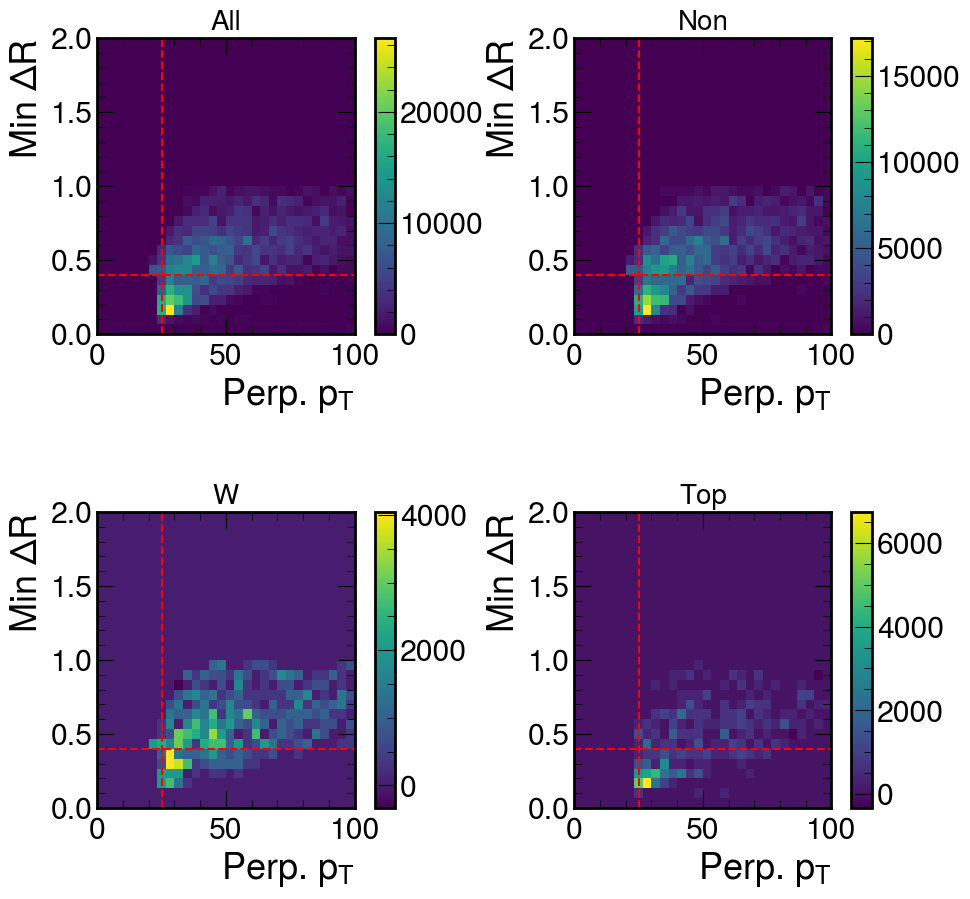

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.6, hspace=0.6)

labels = {
    "no" : "Nothing",
    "all" : "All",
}

colours = {
    "no" : "#1874CD", 
    "all" : "#00BFFF",
}

titles = {
    0 : "All",
    3 : "Non",
    2 : "W",
    1 : "Top",
}

thing = "mujetiso"
var2 = "dr"
var1 = "pt"

row, column = 0, 0

for i, cat in enumerate([0, 3, 2, 1]):
    
    if i == 2:
        row = 1
        column = 0
    
    if i == 0:
        h_no = out[thing].project("region", var1, var2, "cat")[{"region" : hist.loc("noselection"), "cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]}][{"cat" : sum}]
        h_all = out[thing].project("region", var1, var2, "cat")[{"region" : hist.loc("all"), "cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]}][{"cat" : sum}]
    else:
        h_no = out[thing].project("region", var1, var2, "cat")[hist.loc("noselection"), :, :, hist.loc(cat)]
        h_all = out[thing].project("region", var1, var2, "cat")[hist.loc("all"), :, :, hist.loc(cat)]
            
    mplhep.hist2dplot(h_all, ax=ax[row, column]) #, color=colours["all"], label=f"All ({n_all:,.0f})", yerr=False, histtype='fill', alpha=1,)
    ax[row, column].axvline(25, color='red',ls='--')
    ax[row, column].axhline(0.4, color='red',ls='--')

    ax[row, column].set_title(titles[cat], fontsize=20)
    ax[row, column].set_ylabel(r"Min $\Delta$R")
    ax[row, column].set_xlabel(r"Perp. p$_T$")

    column += 1